# Decision Trees

Decision trees are predictive models that allow for a data driven exploration of nonlinear relationships and interactions among many explanatory variables in predicting a response or target variable. When the response variable is categorical (two levels), the model is a called a classification tree. Explanatory variables can be either quantitative, categorical or both. Decision trees create segmentations or subgroups in the data, by applying a series of simple rules or criteria over and over again which choose variable constellations that best predict the response (i.e. target) variable.

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

E:\Python\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
os.getcwd()

'C:\\Users\\praveen\\DS_Notebooks\\coursera\\machine-learning-data-analysis'

# Data Engineering and Analysis

In [3]:
data = pd.read_csv("ml_decision_trees_1.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6504 entries, 0 to 6503
Data columns (total 25 columns):
BIO_SEX      6503 non-null float64
HISPANIC     6481 non-null float64
WHITE        6485 non-null float64
BLACK        6485 non-null float64
NAMERICAN    6485 non-null float64
ASIAN        6485 non-null float64
age          4837 non-null float64
TREG1        6500 non-null float64
ALCEVR1      6444 non-null float64
ALCPROBS1    6504 non-null int64
marever1     6504 non-null int64
cocever1     6504 non-null int64
inhever1     6504 non-null int64
cigavail     6444 non-null float64
DEP1         6486 non-null float64
ESTEEM1      6483 non-null float64
VIOL1        6454 non-null float64
PASSIST      6504 non-null int64
DEVIANT1     6448 non-null float64
SCHCONN1     6368 non-null float64
GPA1         6274 non-null float64
EXPEL1       6486 non-null float64
FAMCONCT     6504 non-null float64
PARACTV      6477 non-null float64
PARPRES      6369 non-null float64
dtypes: float64(20), int64(5

In [5]:
data_clean = data.dropna()

In [6]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4575 entries, 1 to 6502
Data columns (total 25 columns):
BIO_SEX      4575 non-null float64
HISPANIC     4575 non-null float64
WHITE        4575 non-null float64
BLACK        4575 non-null float64
NAMERICAN    4575 non-null float64
ASIAN        4575 non-null float64
age          4575 non-null float64
TREG1        4575 non-null float64
ALCEVR1      4575 non-null float64
ALCPROBS1    4575 non-null int64
marever1     4575 non-null int64
cocever1     4575 non-null int64
inhever1     4575 non-null int64
cigavail     4575 non-null float64
DEP1         4575 non-null float64
ESTEEM1      4575 non-null float64
VIOL1        4575 non-null float64
PASSIST      4575 non-null int64
DEVIANT1     4575 non-null float64
SCHCONN1     4575 non-null float64
GPA1         4575 non-null float64
EXPEL1       4575 non-null float64
FAMCONCT     4575 non-null float64
PARACTV      4575 non-null float64
PARPRES      4575 non-null float64
dtypes: float64(20), int64(5

In [7]:
data_clean.dtypes

BIO_SEX      float64
HISPANIC     float64
WHITE        float64
BLACK        float64
NAMERICAN    float64
ASIAN        float64
age          float64
TREG1        float64
ALCEVR1      float64
ALCPROBS1      int64
marever1       int64
cocever1       int64
inhever1       int64
cigavail     float64
DEP1         float64
ESTEEM1      float64
VIOL1        float64
PASSIST        int64
DEVIANT1     float64
SCHCONN1     float64
GPA1         float64
EXPEL1       float64
FAMCONCT     float64
PARACTV      float64
PARPRES      float64
dtype: object

In [8]:
data_clean.describe()

,BIO_SEX,HISPANIC,WHITE,BLACK,NAMERICAN,ASIAN,age,TREG1,ALCEVR1,ALCPROBS1,...,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
count,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,...,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000
mean,1.521093,0.111038,0.683279,0.236066,0.036284,0.040437,16.493052,0.176393,0.527432,0.369180,...,40.952131,1.618579,0.102514,2.645027,28.360656,2.815647,0.040219,22.570557,6.290710,13.398033
std,0.499609,0.314214,0.465249,0.424709,0.187017,0.197004,1.552174,0.381196,0.499302,0.894947,...,5.381439,2.593230,0.303356,3.520554,5.156385,0.770167,0.196493,2.614754,3.360219,2.085837
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.676712,0.000000,0.000000,0.000000,...,18.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,6.300000,0.000000,3.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.254795,0.000000,0.000000,0.000000,...,38.000000,0.000000,0.000000,0.000000,25.000000,2.250000,0.000000,21.700000,4.000000,12.000000
50%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,16.509589,0.000000,1.000000,0.000000,...,40.000000,0.000000,0.000000,1.000000,29.000000,2.750000,0.000000,23.700000,6.000000,14.000000
75%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.679452,0.000000,1.000000,0.000000,...,45.000000,2.000000,0.000000,4.000000,32.000000,3.500000,0.000000,24.300000,9.000000,15.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.512329,1.000000,1.000000,6.000000,...,50.000000,19.000000,1.000000,27.000000,38.000000,4.000000,1.000000,25.000000,18.000000,15.000000


# Modeling and Prediction

In [9]:
predictors = data_clean[['BIO_SEX','HISPANIC','WHITE','BLACK','NAMERICAN','ASIAN',
'age','ALCEVR1','ALCPROBS1','marever1','cocever1','inhever1','cigavail','DEP1',
'ESTEEM1','VIOL1','PASSIST','DEVIANT1','SCHCONN1','GPA1','EXPEL1','FAMCONCT','PARACTV',
'PARPRES']]

In [10]:
predictors.head()

,BIO_SEX,HISPANIC,WHITE,BLACK,NAMERICAN,ASIAN,age,ALCEVR1,ALCPROBS1,marever1,...,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
1,2.0,0.0,0.0,1.0,0.0,0.0,19.427397,1.0,1,0,...,35.0,1.0,0,5.0,22.0,2.333333,0.0,23.3,9.0,15.0
3,1.0,0.0,0.0,1.0,0.0,0.0,20.430137,0.0,0,1,...,47.0,4.0,1,4.0,19.0,2.000000,0.0,18.7,6.0,14.0
5,1.0,0.0,0.0,1.0,0.0,0.0,14.509589,0.0,0,0,...,41.0,3.0,0,0.0,27.0,2.666667,0.0,23.7,3.0,13.0
6,1.0,0.0,0.0,1.0,0.0,0.0,13.676712,0.0,0,0,...,42.0,5.0,0,7.0,18.0,2.500000,0.0,24.7,6.0,13.0
7,1.0,0.0,1.0,0.0,0.0,0.0,15.178082,1.0,0,1,...,40.0,8.0,1,6.0,20.0,1.500000,0.0,22.3,10.0,14.0


In [11]:
targets = data_clean.TREG1

In [12]:
targets.head()

1    1.0
3    1.0
5    0.0
6    0.0
7    1.0
Name: TREG1, dtype: float64

In [13]:
# 60:40 split train:test
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

In [14]:
pred_train.shape, pred_test.shape

((2745, 24), (1830, 24))

In [15]:
tar_train.shape, tar_test.shape

((2745,), (1830,))

In [16]:
#Build model on training data
classifier = DecisionTreeClassifier()
classifier = classifier.fit(pred_train,tar_train)

In [17]:
classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
predictions = classifier.predict(pred_test)

In [19]:
predictions

array([1., 0., 0., ..., 0., 0., 0.])

In [20]:
sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[1312,  197],
       [ 192,  129]], dtype=int64)

In [21]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.7874316939890711

In [22]:
#Displaying the decision tree
from sklearn import tree
#from StringIO import StringIO
from io import StringIO
#from StringIO import StringIO 
from IPython.display import Image

In [23]:
out = StringIO()

In [24]:
out

In [25]:
tree.export_graphviz(classifier, out_file=out)

In [26]:
import pydotplus

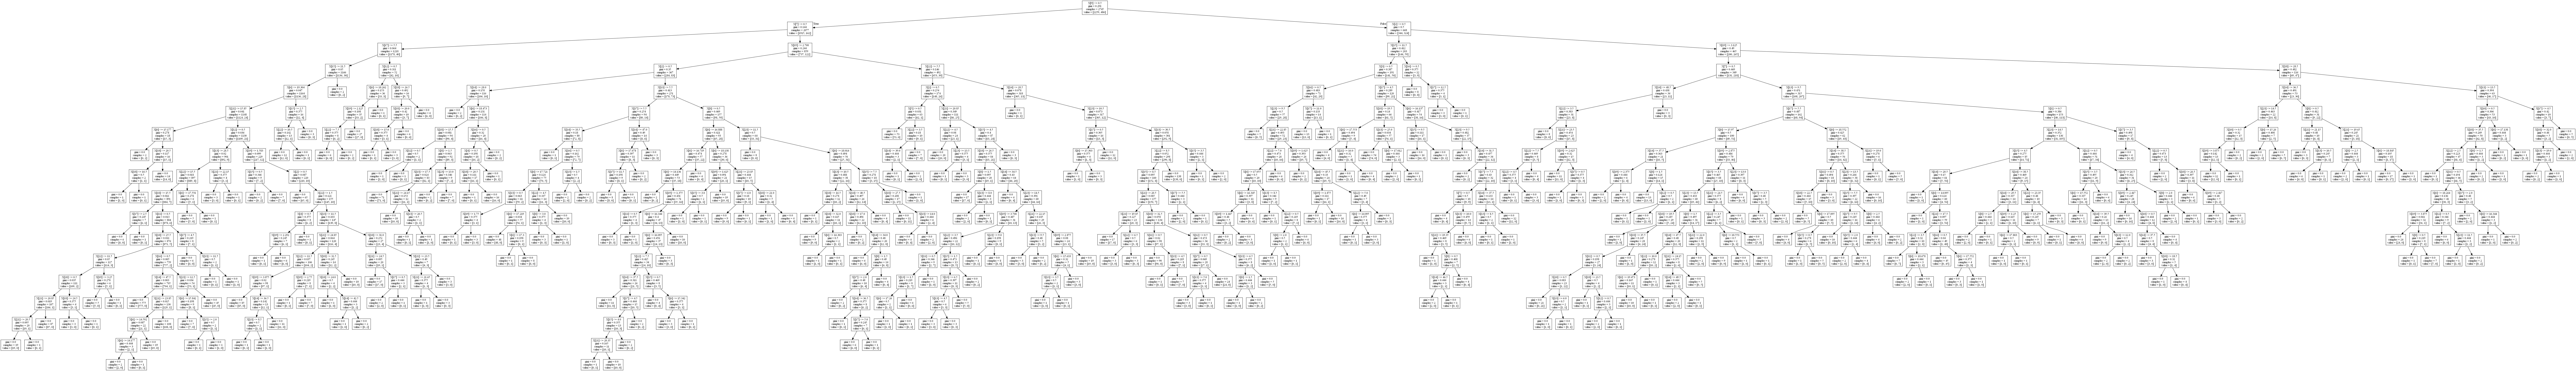

In [27]:
graph = pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())